In [2]:
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
objectives = ["mml", "pg"]
policies = ["off_policy", "on_policy"]
sampling_algorithms = ["mixed", "top_p", "beam_search"]
seeds = ["11", "42", "1993", "2023", "12321"]

experiment_results: Dict[str, List[np.array]] = {}
experiment_steps: Dict[str, List[np.array]] = {}
for obj in objectives:
    for pol in policies:
        for sample_alg in sampling_algorithms:
            experiment_results[f"{obj}_{pol}_{sample_alg}"] = []
            experiment_steps[f"{obj}_{pol}_{sample_alg}"] = []
            for seed in seeds:
                path = "results/sst2-128-results-june-8"
                if pol == "ppo":
                    file = f"{path}/sst2_all_finetune_{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}_accuracy_0.6.csv"
                else:
                    file = f"{path}/sst2_all_finetune_{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}_accuracy.csv"
                try:
                    df = pd.read_csv(file)
                    step_arr = df["Step"].tolist()
                    performance_arr = df["Value"].tolist()
                    experiment_steps[f"{obj}_{pol}_{sample_alg}"].append(np.array(step_arr))
                    experiment_results[f"{obj}_{pol}_{sample_alg}"].append(np.array(performance_arr))
                except Exception as e:
                    print("not found", e)
                    continue
def experiment_to_numpy(experiment_name: str) -> Tuple[np.array, np.array, np.array, np.array]:
    x = np.array(experiment_steps[experiment_name][0])
    y = np.array(experiment_results[experiment_name]) * 100.00
    print(experiment_name, x.shape, y.shape)
    mean_y = np.mean(y, axis=0)
    std_y = np.std(y, axis=0)
    return x, y, mean_y, std_y


experiment_means = {exp_name: experiment_to_numpy(exp_name)[2] for exp_name in experiment_results.keys()}
experiment_stds = {exp_name: experiment_to_numpy(exp_name)[3] for exp_name in experiment_results.keys()}
experiment_steps = {exp_name: experiment_to_numpy(exp_name)[0] for exp_name in experiment_results.keys()}

mml_off_policy_mixed (81,) (5, 81)
mml_off_policy_top_p (81,) (5, 81)
mml_off_policy_beam_search (81,) (5, 81)
mml_on_policy_mixed (81,) (5, 81)
mml_on_policy_top_p (81,) (5, 81)
mml_on_policy_beam_search (81,) (5, 81)
pg_off_policy_mixed (81,) (5, 81)
pg_off_policy_top_p (81,) (5, 81)
pg_off_policy_beam_search (81,) (5, 81)
pg_on_policy_mixed (81,) (5, 81)
pg_on_policy_top_p (81,) (5, 81)
pg_on_policy_beam_search (81,) (5, 81)
mml_off_policy_mixed (81,) (5, 81)
mml_off_policy_top_p (81,) (5, 81)
mml_off_policy_beam_search (81,) (5, 81)
mml_on_policy_mixed (81,) (5, 81)
mml_on_policy_top_p (81,) (5, 81)
mml_on_policy_beam_search (81,) (5, 81)
pg_off_policy_mixed (81,) (5, 81)
pg_off_policy_top_p (81,) (5, 81)
pg_off_policy_beam_search (81,) (5, 81)
pg_on_policy_mixed (81,) (5, 81)
pg_on_policy_top_p (81,) (5, 81)
pg_on_policy_beam_search (81,) (5, 81)
mml_off_policy_mixed (81,) (5, 81)
mml_off_policy_top_p (81,) (5, 81)
mml_off_policy_beam_search (81,) (5, 81)
mml_on_policy_mixed (81,)

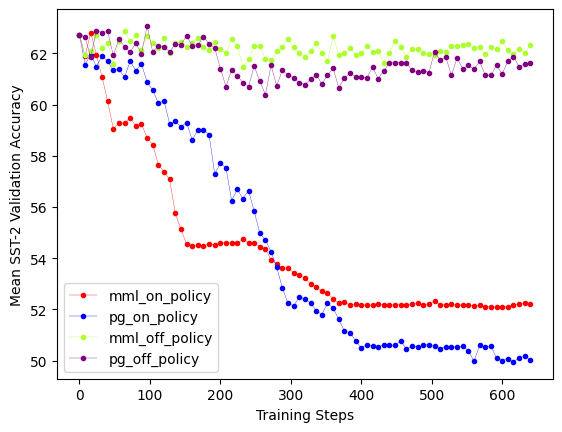

In [56]:
# comparison between of mml objectives vs. policy gradient on the "on-policy" vs "off-policy" training regimes.
# we are going to average accross the other dimensions: "top-p", "beam_search", "mixed".

fig = plt.figure()

experiments_to_see = [
    "mml_on_policy",
    "pg_on_policy",
    "mml_off_policy",
    "pg_off_policy",
]
colors = ["red", "blue", "greenyellow", "purple"]

for idx, exp in enumerate(experiments_to_see):
    means = (experiment_means[exp+"_top_p"] + experiment_means[exp+"_beam_search"] + experiment_means[exp+"_mixed"]) / 3.0
    plt.plot(experiment_steps[exp+"_top_p"], means, color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean SST-2 Validation Accuracy")

plt.show()

# The message is that on-policy sampling is failing! and off-policy is better!
# These are rewards with rewards normalization.

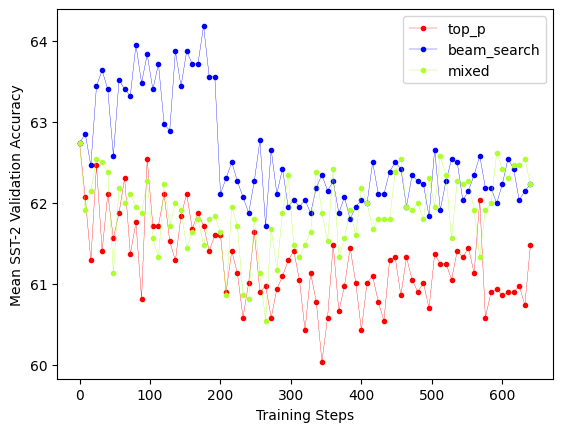

In [57]:
# comparison of the decoding techniques, which one is acheiving better results here!
# the development results are with top-p with default t = 1.
# although beam search sampling with off-policy learning is acheiving better result!

fig = plt.figure()

experiments_to_see = [
    "top_p",
    "beam_search",
    "mixed",
]
colors = ["red", "blue", "greenyellow"]

for idx, exp in enumerate(experiments_to_see):
    avg_dims = ["mml_off_policy", "pg_off_policy"]
    means = 0.0
    for avg_dim in avg_dims:
        means += experiment_means[f"{avg_dim}_{exp}"]
    plt.plot(experiment_steps["mml_off_policy_top_p"], means/2.0, color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean SST-2 Validation Accuracy")

plt.show()

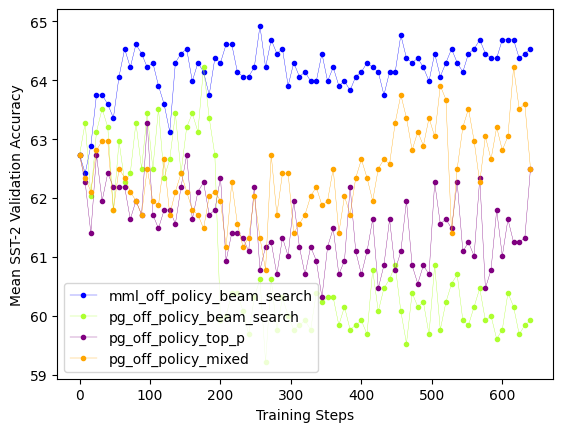

In [58]:
# is pg better than mml?

fig = plt.figure()

experiments_to_see = [
    "mml_off_policy_beam_search",
    "pg_off_policy_beam_search",
    "pg_off_policy_top_p",
    "pg_off_policy_mixed",
]
colors = ["blue", "greenyellow", "purple", "orange"]

for idx, exp in enumerate(experiments_to_see):
    plt.plot(experiment_steps[exp], experiment_means[exp], color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean SST-2 Validation Accuracy")

plt.show()

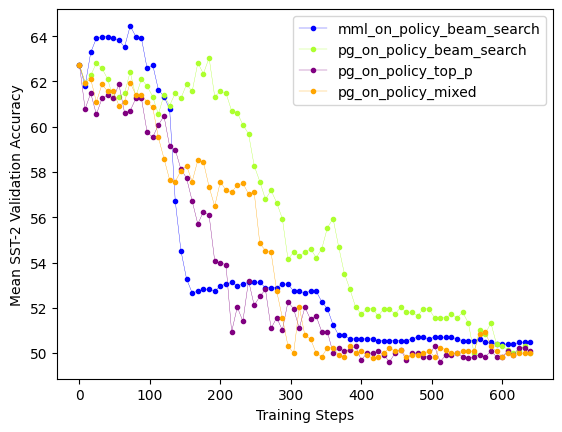

In [59]:
# is pg better than mml?

fig = plt.figure()

experiments_to_see = [
    "mml_on_policy_beam_search",
    "pg_on_policy_beam_search",
    "pg_on_policy_top_p",
    "pg_on_policy_mixed",
]
colors = ["blue", "greenyellow", "purple", "orange"]

for idx, exp in enumerate(experiments_to_see):
    plt.plot(experiment_steps[exp], experiment_means[exp], color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean SST-2 Validation Accuracy")

plt.show()

In [61]:
objectives = ["mml"]
policies = ["off_policy", "on_policy", "ppo"]
sampling_algorithms = ["mixed", "top_p", "beam_search"]
seeds = ["11", "42", "1993", "2023", "12321"]

experiment_results: Dict[str, List[np.array]] = {}
experiment_steps: Dict[str, List[np.array]] = {}
for obj in objectives:
    for pol in policies:
        for sample_alg in sampling_algorithms:
            experiment_results[f"{obj}_{pol}_{sample_alg}"] = []
            experiment_steps[f"{obj}_{pol}_{sample_alg}"] = []
            for seed in seeds:
                path = "results/sst2-128-results-june-8"
                if pol == "ppo":
                    file = f"{path}/sst2_all_finetune_{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}_accuracy_0.6.csv"
                else:
                    file = f"{path}/sst2_all_finetune_{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}_accuracy.csv"
                try:
                    df = pd.read_csv(file)
                    step_arr = df["Step"].tolist()
                    performance_arr = df["Value"].tolist()
                    experiment_steps[f"{obj}_{pol}_{sample_alg}"].append(np.array(step_arr))
                    experiment_results[f"{obj}_{pol}_{sample_alg}"].append(np.array(performance_arr))
                except Exception as e:
                    print("not found", e)
                    continue
def experiment_to_numpy(experiment_name: str) -> Tuple[np.array, np.array, np.array, np.array]:
    x = np.array(experiment_steps[experiment_name][0])
    y = np.array(experiment_results[experiment_name]) * 100.00
    print(experiment_name, x.shape, y.shape)
    mean_y = np.mean(y, axis=0)
    std_y = np.std(y, axis=0)
    return x, y, mean_y, std_y


experiment_means = {exp_name: experiment_to_numpy(exp_name)[2] for exp_name in experiment_results.keys()}
experiment_stds = {exp_name: experiment_to_numpy(exp_name)[3] for exp_name in experiment_results.keys()}
experiment_steps = {exp_name: experiment_to_numpy(exp_name)[0] for exp_name in experiment_results.keys()}

mml_off_policy_mixed (81,) (5, 81)
mml_off_policy_top_p (81,) (5, 81)
mml_off_policy_beam_search (81,) (5, 81)
mml_on_policy_mixed (81,) (5, 81)
mml_on_policy_top_p (81,) (5, 81)
mml_on_policy_beam_search (81,) (5, 81)
mml_ppo_mixed (81,) (5, 81)
mml_ppo_top_p (81,) (5, 81)
mml_ppo_beam_search (81,) (5, 81)
mml_off_policy_mixed (81,) (5, 81)
mml_off_policy_top_p (81,) (5, 81)
mml_off_policy_beam_search (81,) (5, 81)
mml_on_policy_mixed (81,) (5, 81)
mml_on_policy_top_p (81,) (5, 81)
mml_on_policy_beam_search (81,) (5, 81)
mml_ppo_mixed (81,) (5, 81)
mml_ppo_top_p (81,) (5, 81)
mml_ppo_beam_search (81,) (5, 81)
mml_off_policy_mixed (81,) (5, 81)
mml_off_policy_top_p (81,) (5, 81)
mml_off_policy_beam_search (81,) (5, 81)
mml_on_policy_mixed (81,) (5, 81)
mml_on_policy_top_p (81,) (5, 81)
mml_on_policy_beam_search (81,) (5, 81)
mml_ppo_mixed (81,) (5, 81)
mml_ppo_top_p (81,) (5, 81)
mml_ppo_beam_search (81,) (5, 81)


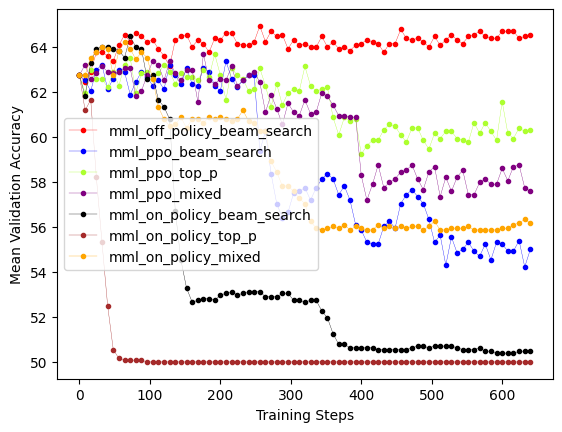

In [68]:
# only compare mml off policy beam search and mml on policy beam search with ppo! 
fig = plt.figure()

experiments_to_see = [
    "mml_off_policy_beam_search",
    "mml_ppo_beam_search",
    "mml_ppo_top_p",
    "mml_ppo_mixed",
    "mml_on_policy_beam_search",
    "mml_on_policy_top_p",
    "mml_on_policy_mixed",
]
colors = ["red", "blue", "greenyellow", "purple", "black", "brown", "orange", "green"]

for idx, exp in enumerate(experiments_to_see):
    plt.plot(experiment_steps[exp], experiment_means[exp], color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Validation Accuracy")

plt.show()

In [47]:
# for both pg and mml, on-policy learning diverges!
# z-scoring is more robust to divergence as we give negative reward for an ungrammatical sample.
# z-scoring is not helpful for mml as expected.

# best model with beam search decoding:
# mml_basic_off_policy_beam_search.
seed_1_max = max(experiment_results["mml_basic_off_policy_beam_search"][0])
seed_2_max = max(experiment_results["mml_basic_off_policy_beam_search"][1])
seed_3_max = max(experiment_results["mml_basic_off_policy_beam_search"][2])
seed_4_max = max(experiment_results["mml_basic_off_policy_beam_search"][3])
seed_5_max = max(experiment_results["mml_basic_off_policy_beam_search"][4])

initial_result_1 = experiment_results["mml_basic_off_policy_beam_search"][0][0]
initial_result_2 = experiment_results["mml_basic_off_policy_beam_search"][1][0]
initial_result_3 = experiment_results["mml_basic_off_policy_beam_search"][2][0]
initial_result_4 = experiment_results["mml_basic_off_policy_beam_search"][3][0]
initial_result_5 = experiment_results["mml_basic_off_policy_beam_search"][4][0]

print(seed_1_max, seed_2_max, seed_3_max, seed_4_max, seed_5_max)
print(initial_result_1, initial_result_2, initial_result_3, initial_result_4, initial_result_5)
print(
    "gains:",
    seed_1_max - initial_result_1,
    seed_2_max - initial_result_2,
    seed_3_max - initial_result_3,
    seed_4_max - initial_result_4,
    seed_5_max - initial_result_5,
)
gain_average = seed_1_max - initial_result_1
gain_average += seed_2_max - initial_result_2
gain_average += seed_3_max - initial_result_3
gain_average += seed_4_max - initial_result_4
gain_average += seed_5_max - initial_result_5
print("gain average:", gain_average / 5.0 * 100.00)

0.68359375 0.66796875 0.64453125 0.6953125 0.6484375
0.6328125 0.60546875 0.59765625 0.6953125 0.60546875
gains: 0.05078125 0.0625 0.046875 0.0 0.04296875
gain average: 4.0625


In [9]:
objectives = ["mml_basic", "pg_basic", "mml_z_score", "pg_z_score"]
policies = ["on_policy", "off_policy"]
sampling_algorithms = ["top_p", "beam_search"]
seeds = ["11", "42", "1993", "2023", "12321"]

experiment_results: Dict[str, List[np.array]] = {}
experiment_steps: Dict[str, List[np.array]] = {}
for obj in objectives:
    for pol in policies:
        for sample_alg in sampling_algorithms:
            experiment_results[f"{obj}_{pol}_{sample_alg}"] = []
            experiment_steps[f"{obj}_{pol}_{sample_alg}"] = []
            for seed in seeds:
                path = "results/sst2-128-results"
                if sample_alg == "top_p":
                    file = f"{path}/{seed}_0.00001_0_1_0_{obj}_{pol}.csv"
                else:
                    file = f"{path}/{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}.csv"
                try:
                    df = pd.read_csv(file)
                    step_arr = df["Step"].tolist()
                    performance_arr = df["Value"].tolist()
                    if len(step_arr) < 100:
                        continue
                    experiment_steps[f"{obj}_{pol}_{sample_alg}"].append(np.array(step_arr))
                    experiment_results[f"{obj}_{pol}_{sample_alg}"].append(np.array(performance_arr))
                except Exception as e:
                    print("not found", e)
                    continue

def experiment_to_numpy(experiment_name: str) -> Tuple[np.array, np.array, np.array, np.array]:
    x = np.array(experiment_steps[experiment_name][0])
    y = np.array(experiment_results[experiment_name]) * 100.00
    print(experiment_name, x.shape, y.shape)
    mean_y = np.mean(y, axis=0)
    std_y = np.std(y, axis=0)
    return x, y, mean_y, std_y


experiment_means = {exp_name: experiment_to_numpy(exp_name)[2] for exp_name in experiment_results.keys()}
experiment_stds = {exp_name: experiment_to_numpy(exp_name)[3] for exp_name in experiment_results.keys()}
experiment_steps = {exp_name: experiment_to_numpy(exp_name)[0] for exp_name in experiment_results.keys()}

mml_basic_on_policy_top_p (161,) (5, 161)
mml_basic_on_policy_beam_search (161,) (5, 161)
mml_basic_off_policy_top_p (161,) (5, 161)
mml_basic_off_policy_beam_search (161,) (5, 161)
pg_basic_on_policy_top_p (161,) (5, 161)
pg_basic_on_policy_beam_search (159,) (3, 159)
pg_basic_off_policy_top_p (161,) (5, 161)
pg_basic_off_policy_beam_search (161,) (5, 161)
mml_z_score_on_policy_top_p (161,) (5, 161)
mml_z_score_on_policy_beam_search (161,) (5, 161)
mml_z_score_off_policy_top_p (161,) (5, 161)
mml_z_score_off_policy_beam_search (161,) (5, 161)
pg_z_score_on_policy_top_p (161,) (5, 161)
pg_z_score_on_policy_beam_search (161,) (5, 161)
pg_z_score_off_policy_top_p (161,) (5, 161)
pg_z_score_off_policy_beam_search (161,) (5, 161)
mml_basic_on_policy_top_p (161,) (5, 161)
mml_basic_on_policy_beam_search (161,) (5, 161)
mml_basic_off_policy_top_p (161,) (5, 161)
mml_basic_off_policy_beam_search (161,) (5, 161)
pg_basic_on_policy_top_p (161,) (5, 161)
pg_basic_on_policy_beam_search (159,) (3,

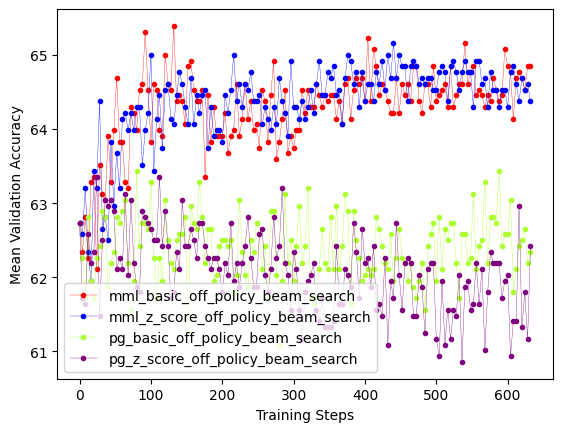

In [10]:
fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy_beam_search",
    "mml_z_score_off_policy_beam_search",
    "pg_basic_off_policy_beam_search",
    "pg_z_score_off_policy_beam_search",
]
colors = ["red", "blue", "greenyellow", "purple", "black", "brown", "orange", "green"]

for idx, exp in enumerate(experiments_to_see):
    plt.plot(experiment_steps[exp][:159], experiment_means[exp][:159], color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Validation Accuracy")

plt.show()

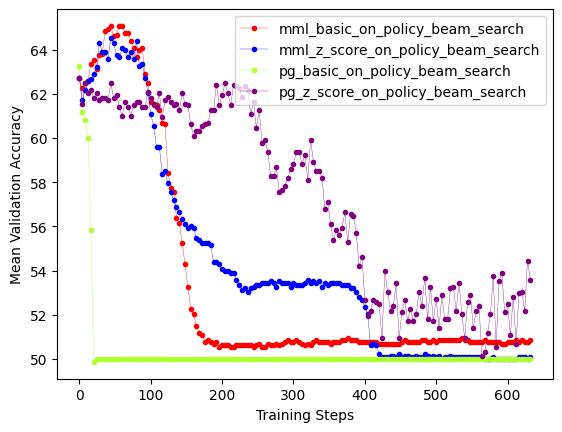

In [11]:
fig = plt.figure()

experiments_to_see = [
    "mml_basic_on_policy_beam_search",
    "mml_z_score_on_policy_beam_search",
    "pg_basic_on_policy_beam_search",
    "pg_z_score_on_policy_beam_search",
]
colors = ["red", "blue", "greenyellow", "purple", "black", "brown", "orange", "green"]

for idx, exp in enumerate(experiments_to_see):
    plt.plot(experiment_steps[exp][:159], experiment_means[exp][:159], color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Validation Accuracy")

plt.show()